In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

#Load datasets from 1_DataClean.ipynb



In [ ]:
# # # Please comment out this cell.

# # # Code in this cell can read the file directly from shared drive. 
# # # It requaires to hard code the path for each single file.


# # # Import PyDrive and associated libraries.
# # # This only needs to be done once per notebook.
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

# # # Authenticate and create the PyDrive client.
# # # This only needs to be done once per notebook.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#id = '11Xs6-KK_vADxqIsahrngOa--6g-hg2fP'
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('Filename.csv')  
#df_test = pd.read_csv('Filename.csv')
#df_test.head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


In [ ]:
# # # Run it if it is the first time you running this notebook.

# # # Mount your google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load cleaned datasets generated from 1_DataClean.ipynb
clean_train_id=pd.read_csv('drive/MyDrive/Capstone/Data/clean_train_id.csv').iloc[:,1:]
clean_train_trans=pd.read_csv('drive/MyDrive/Capstone/Data/clean_train_trans.csv').iloc[:,1:]

In [ ]:
clean_train_trans.shape

(590540, 393)

In [ ]:
clean_train_id.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,100.0,NotFound,NaN,New,NotFound,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,NotFound,49.0,New,NotFound,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,NotFound,52.0,New,NotFound,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,1.0,0.0,100.0,NotFound,NaN,Found,Found,...,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS


In [ ]:
clean_train_id['TransactionID'].isnull().values.any()

False

In [ ]:
#namedataframe
clean_train_id.name="clean_train_id"
clean_train_trans.name='clean_train_trans'
clean_train_id.name

'clean_train_id'

In [ ]:
clean_train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Explore Pairwise Correlations

##heatmap for clean_train_id dataframe

Correlation heatmaps are created to show a graphical representation of correlation matrix representing correlation between different variables.

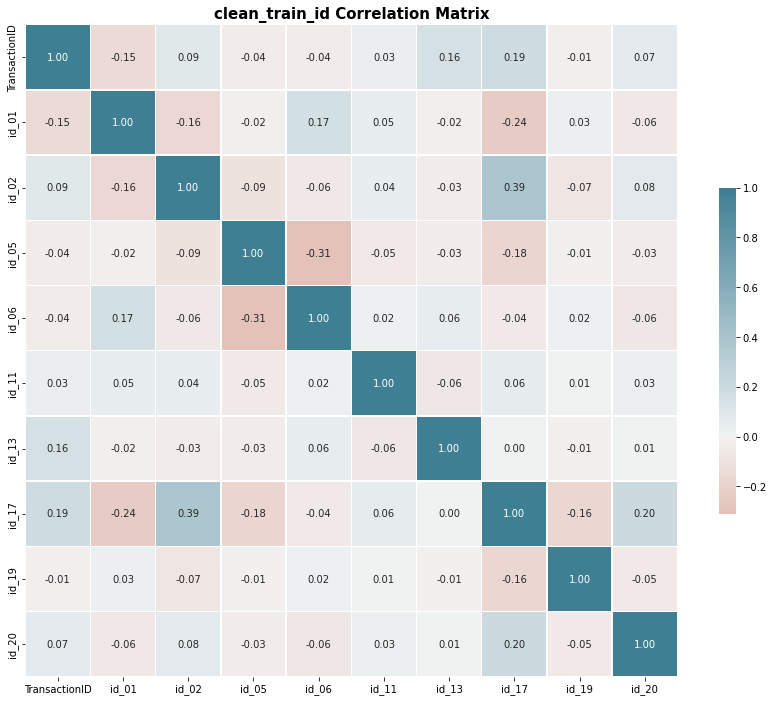

In [ ]:
#Create correlation heatmaps showing the correlation between variables in the clean_train_id dataframe
#create a function "correlation_heatmap" that creates a correlation heatmap for the input dataframe
def correlation_heatmaps(df):
    plt.figure(figsize=(15,12))
    palette=sns.diverging_palette(20,220,n=256)
    corr=df.corr(method="kendall")

    sns.heatmap(corr, annot=True, fmt=".2f",cmap=palette, center=0,square=True,linewidth=0.5, cbar_kws={"shrink":.5})
    plt.title(df.name+" Correlation Matrix",size=15, weight="bold")

correlation_heatmaps(clean_train_id)


the larger the number and the darker the color the higher the correlation.  id_17 and id_2 has a weak positive correaltion. id_17 and id_1 has a weak negative correlation. id_17 and id_20 has a weak positive correlation

##clean_train_trans Dataframe

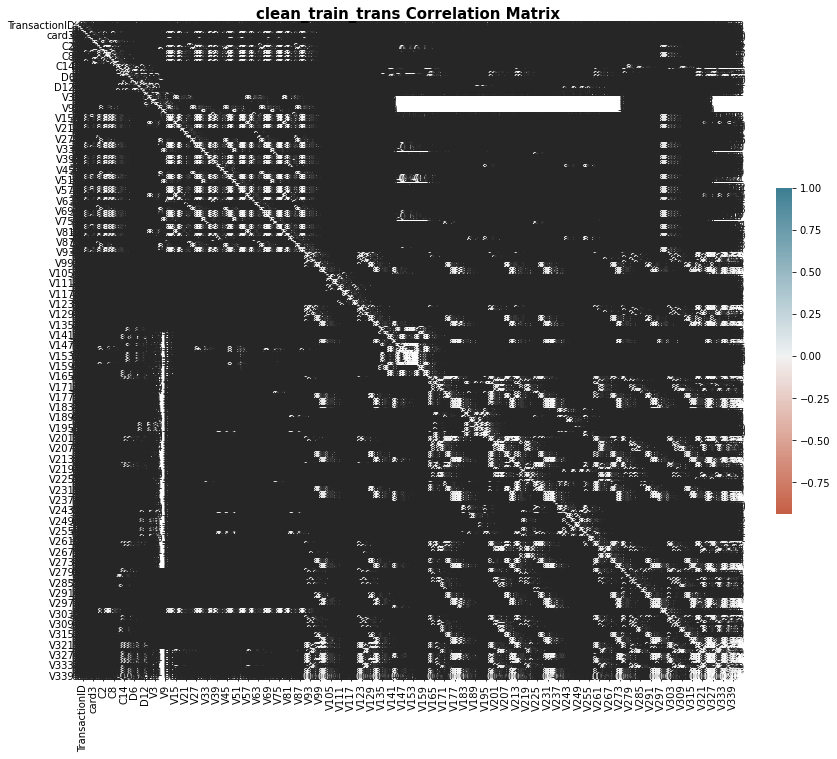

In [ ]:
#run this cell with care....it takes 45 mins to run....
#create a correlation heatmap for clean_train_trans dataframe
correlation_heatmaps(clean_train_trans)  ##takes too long to execute

The heatmap above is not helpful to show which variables are highly correlation.  We are going to find highest correlations between two variables using the absolute value of the correlation coefficients.

###Highest Correlated Vairables in clean_train_trans


Because the clean_train_trans dataframe has too many columns, so a heatmap is not helpful to show which variables are highly correlated.  We are going to find highest correlations between two variables using the absolute value of the correlation coefficients.

In [ ]:
matr=clean_train_trans.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

Highest 20 correlated vairables in clean_train_trans are the following:

In [ ]:
#find the highest 20 correlated variables in clean_train_trans
round(matr[:20],20)

TransactionID  TransactionID    1.000000
D12            D4               0.999999
V322           V95              0.999949
V96            V323             0.999948
V97            V324             0.999947
V322           V101             0.999698
V279           V322             0.999624
V95            V101             0.999594
V293           V279             0.999568
C12            C7               0.999489
V324           V280             0.999464
V322           V293             0.999403
V177           V167             0.999364
V324           V103             0.999258
V105           V329             0.999101
V101           V293             0.998919
V323           V102             0.998828
V295           V324             0.998827
V97            V103             0.998789
V279           V95              0.998710
dtype: float64

The top 20 correlations are very strong (>0.99) in the clean_train_trans dataframe.  

Then we broke down the columns in the clean_train_trans dataframe in to groups by their definition and observed the pairwise correlations between vairables.

### C1_to_C14 correlation heatmap

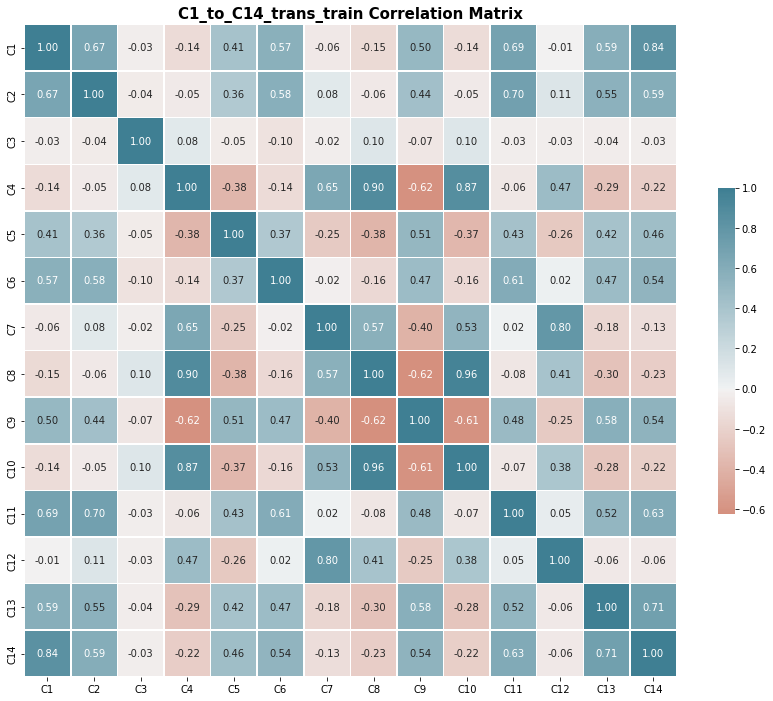

In [ ]:
# There are 393 columns in clean_train_trans
#C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked. 
#Pairwise Correlation heatmap for C1~C14
C1_to_C14_trans_train=clean_train_trans[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]
C1_to_C14_trans_train.head()
C1_to_C14_trans_train.name="C1_to_C14_trans_train"

correlation_heatmaps(C1_to_C14_trans_train)

Variables with very strong correlations(>0.8):C1&C14, C4&C10, C4&C8, C7&C12, C8&C10.


### D1_to_D15 correlation heatmap

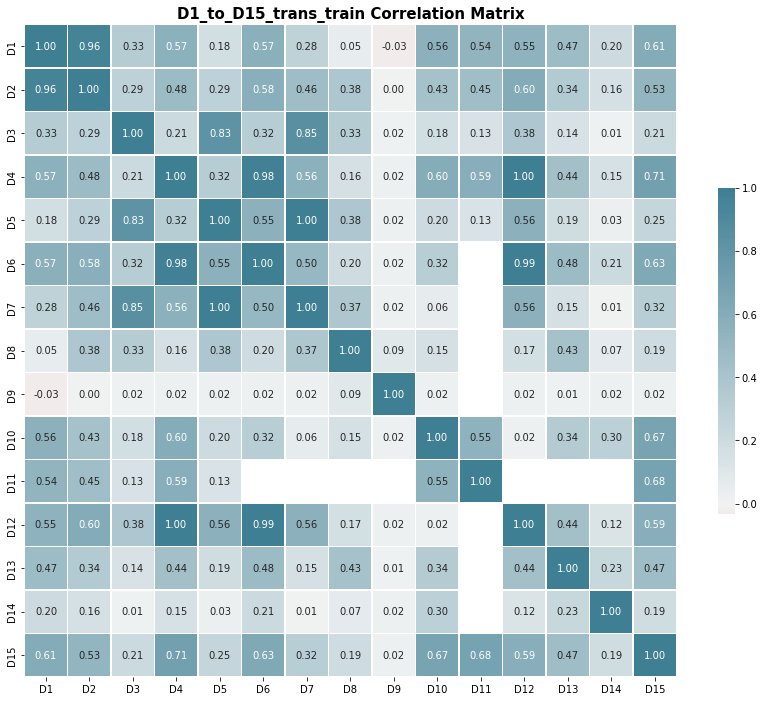

In [ ]:
#Create a correlation heatmap for D1-D15: timedelta, such as days between previous transaction, etc. 

D1_to_D15_trans_train=clean_train_trans[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']]
D1_to_D15_trans_train.head()
D1_to_D15_trans_train.name="D1_to_D15_trans_train"

correlation_heatmaps(D1_to_D15_trans_train)

variables with very storn correlation (>0.8):D1&D2, D3&D5, D4&D6, D3&D7, D6&D12, 

###healmap for Vxxx columns

In [ ]:
#Create correlation heatmap for: Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
Vxxx_trans_train = clean_train_trans.filter(regex=("^V.*"))
Vxxx_trans_train
Vxxx_trans_train.name="Vxxx_trans_train"

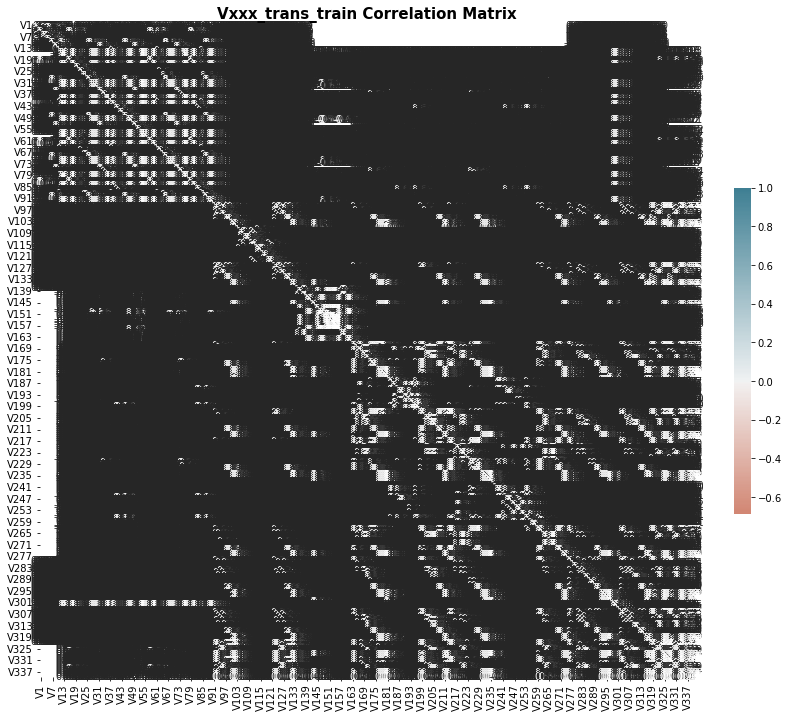

In [ ]:
correlation_heatmaps(Vxxx_trans_train)

Correlation heatmap is hard to read to interpret correlation between variables, therefore we find the top 10 highest correlations from the correlation matrix of Vxxx 

---

columns.

###Highest Correlated variables in Vxxx columns

In [ ]:
# pairs of vairables with the highest correlations in Vxxx columns
matr_v=Vxxx_trans_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
round(matr_v[:10],20)

V1    V1      1.000000
V322  V95     0.999949
V323  V96     0.999948
V97   V324    0.999947
V322  V101    0.999698
V279  V322    0.999624
V95   V101    0.999594
V279  V293    0.999568
V280  V324    0.999464
V293  V322    0.999403
dtype: float64

We can see that the top 10 strongest correlations are all above 0.99.

#Further Data Exploration 

We explored some of the columns with known meanings such as distribution, minimum, maximum, etc.  We created visualizations to better understand any trend.

##Check isnull for TransactionId and isFraud 

In [ ]:
clean_train_id['TransactionID'].isnull().values.any()


False

In [ ]:
clean_train_trans['TransactionID'].isnull().values.any()

False

In [ ]:
clean_train_trans['isFraud'].isnull().values.any()

False

## Check distribution of isFraud--if data is imbalanced

In [ ]:
clean_train_trans['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Count of fraudulent and non-fraudulent transactions')

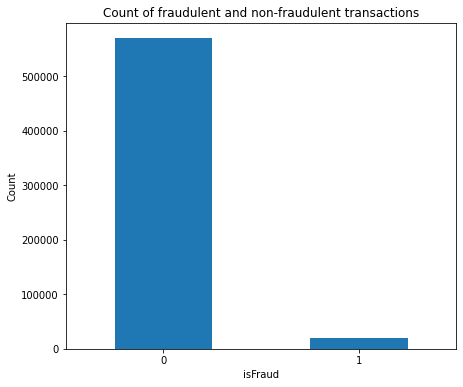

In [ ]:
clean_train_trans['isFraud'].value_counts().plot(kind='bar',figsize=(7, 6), rot=0)

plt.xlabel("isFraud")
plt.ylabel("Count")
plt.title("Count of fraudulent and non-fraudulent transactions")
# the training dataset is highly imbalanced

Our training data is highly imbalanced.  There are a lot more non fraud transactions than fraud transactions.



##Transaction Amount Column

(0.0, 7000.0)

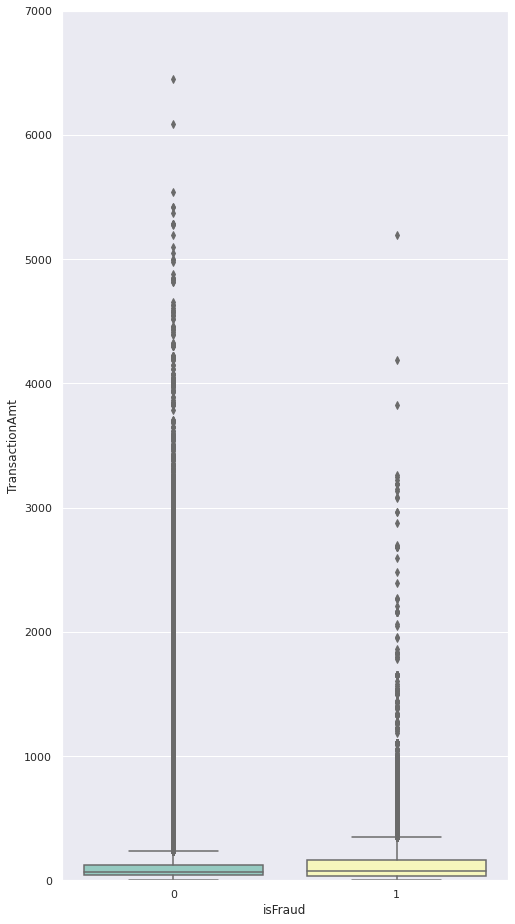

In [ ]:
#transaction amount boxplot by isFraud
g = sns.boxplot(x="isFraud", y="TransactionAmt", data=clean_train_trans,palette="Set3")
sns.set(rc = {'figure.figsize':(8,30)})

#there is an outlier for isFraud=0
plt.ylim(0, 7000)

The distribution of transaction amount beteween fraud and non-fraud transactions are very similar.  Non-fraud transactions has more extreme transaction amount (more transactions with transaction amount >$4000) than fraud transactions

In [ ]:
Fraud=clean_train_trans[clean_train_trans['isFraud']==1]
NonFraud=clean_train_trans[clean_train_trans['isFraud']==0]

In [ ]:
#Quantiles of Fraud and No Fraud Transactions
pd.concat([Fraud['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]), 
                 NonFraud['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99])],
                axis=1, keys=['Fraud Transaction Amount', "Non-Fraud Transaction Amount"])

,Fraud Transaction Amount,Non-Fraud Transaction Amount
0.01,6.74096,9.51288
0.10,18.93600,26.31000
0.25,35.04400,43.97000
0.50,75.00000,68.50000
0.75,161.00000,120.00000
0.90,335.00000,267.11200
0.99,994.00000,1104.00000


Fraud Transactions have lower transaction amount for 0.01, 0.10, 0.25 and 0.99 quantiles, but have higher transaction amount for 0.50, 0.75 and 0.90 quantiles than non-fraud transactions

###Transaction Amount Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

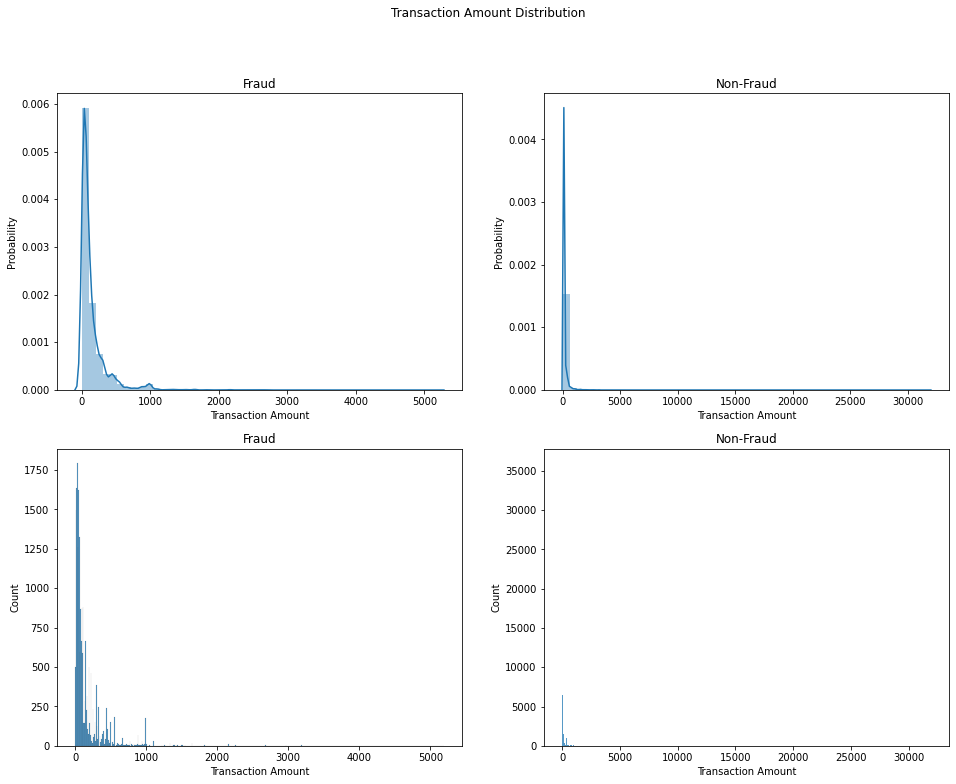

In [ ]:

#create a subplot for the distribution of Transation Amount for Fraud transactions
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Amount Distribution')
plt.subplot(221)
g = sns.distplot(Fraud['TransactionAmt'])
g.set_title("Fraud")
g.set_xlabel("Transaction Amount")
g.set_ylabel("Probability")

#create a subplot for the distribution of Transation Amount for Non-Fraud transactions
plt.subplot(222)
g = sns.distplot(NonFraud['TransactionAmt'])
g.set_title("Non-Fraud")
g.set_xlabel("Transaction Amount")
g.set_ylabel("Probability")

#g.xaxis.set_major_locator(ticker.MultipleLocator(1000))
#g.xaxis.set_major_formatter(ticker.ScalarFormatter())

#create a subplot for the histogram of Transation Amount for Fraud transactions
plt.subplot(223)
g = sns.histplot(Fraud['TransactionAmt'])
g.set_title("Fraud")
g.set_xlabel("Transaction Amount")
g.set_ylabel("Count")

#create a subplot for the histogram of Transation Amount for Non-Fraud transactions
plt.subplot(224)
g = sns.histplot(NonFraud['TransactionAmt'])
g.set_title("Non-Fraud")
g.set_xlabel("Transaction Amount")
g.set_ylabel("Count")

#g.xaxis.set_major_locator(ticker.MultipleLocator(1000))
#g.xaxis.set_major_formatter(ticker.ScalarFormatter())

Distribution of fraud and non-fraud transactions are very similar--both are right-skewed and most of the transactions are within $1000.

##ProductCD: product code, the product for each transaction

(0.0, 1000.0)

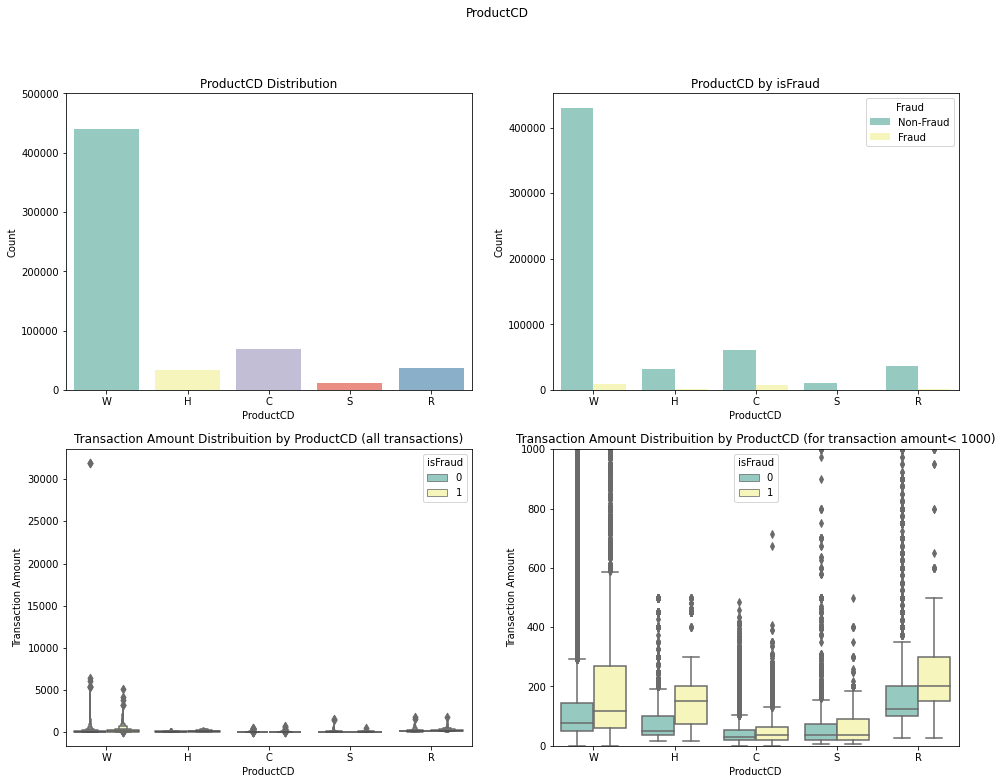

In [ ]:
#Create a histogram for Transaction Amount by Product Code
plt.figure(figsize=(16,12))
plt.suptitle('ProductCD')
plt.subplot(221)
g = sns.countplot(x='ProductCD', data=clean_train_trans,palette="Set3")
g.set_title("ProductCD Distribution")
g.set_xlabel("ProductCD")
g.set_ylabel("Count")
g.set_ylim(0,500000)

# create a histogram of ProductCD by isFraud
plt.subplot(222)
g = sns.countplot(x='ProductCD', hue='isFraud', data=clean_train_trans,palette="Set3")
plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Count of ProductCD by isFraud")
g.set_xlabel("ProductCD")
g.set_ylabel("Count")

#Create a graph for Transaction amount by product CD
plt.subplot(223)
g = sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud',data=clean_train_trans,palette="Set3")
g.set_title("Transaction Amount Distribuition by ProductCD (all transactions)")
g.set_xlabel("ProductCD")
g.set_ylabel("Transaction Amount")

#Create a graph for filtered Transaction amount by product CD
plt.subplot(224)
g = sns.boxplot(x='ProductCD', y='TransactionAmt', hue='isFraud',data=clean_train_trans,palette="Set3")
g.set_title("Transaction Amount Distribuition by ProductCD (for transaction amount< 1000)")
g.set_xlabel("ProductCD")
g.set_ylabel("Transaction Amount")


plt.ylim([0, 1000])



Majority of Fraud transactions happen in Product CD Category W and C. The average fraud transaction amount is higher in categories W, H and R than non-fraud transactions.


In [ ]:
clean_train_trans[["TransactionAmt",'ProductCD']].groupby('ProductCD').agg({'TransactionAmt': ['mean', 'std','count']})

TransactionAmt                    
                    mean         std   count
ProductCD                                   
C              42.872353   38.943070   68519
H              73.170058   61.950955   33024
R             168.306188  142.035568   37699
S              60.269487   80.546775   11628
W             153.158554  268.733692  439670

Porduct type R and W has much higher mean than other product types. Product type W has the most frequnet transactions.

In [ ]:
clean_train_trans[["TransactionAmt",'ProductCD','isFraud']].groupby(['ProductCD','isFraud']).agg({'TransactionAmt': ['mean', 'std','count']})

TransactionAmt                    
                            mean         std   count
ProductCD isFraud                                   
C         0            42.077463   37.987818   60511
          1            48.878796   45.069468    8008
H         0            68.990016   54.650446   31450
          1           156.691233  116.317823    1574
R         0           165.327516  140.327026   36273
          1           244.074334  162.779968    1426
S         0            60.080205   81.139925   10942
          1            63.288630   70.397027     686
W         0           151.578232  267.501039  430701
          1           229.047325  313.195042    8969

Product Type R and W has the highest average transaction amount.

##card1 - card6 : payment card information, such as card type, card category, issue bank, country, etc.


### Visualizing  variables Card 4 and Card 6 (categorical variable)

(0.0, 1000.0)

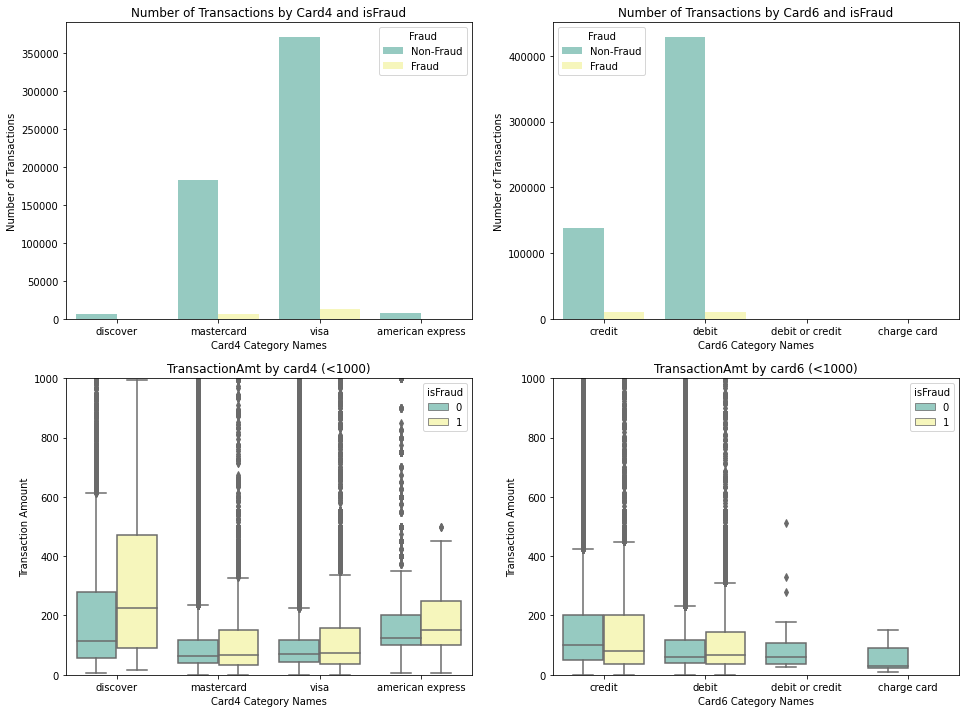

In [ ]:

plt.figure(figsize=(16,12))
plt.subplot(221)
g = sns.countplot(x='card4', hue='isFraud', data=clean_train_trans,palette="Set3")
plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Transactions by Card4 and isFraud")
g.set_xlabel("Card4 Category Names")
g.set_ylabel("Number of Transactions")

plt.subplot(222)
g = sns.countplot(x='card6', hue='isFraud', data=clean_train_trans,palette="Set3")
plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Transactions by Card6 and isFraud")
g.set_xlabel("Card6 Category Names")
g.set_ylabel("Number of Transactions")

plt.subplot(223)
g = sns.boxplot(x='card4', y='TransactionAmt', hue='isFraud', data=clean_train_trans,palette="Set3")
g.set_title("TransactionAmt by card4 (<1000)")
g.set_xlabel("Card4 Category Names")
g.set_ylabel("Transaction Amount")
plt.ylim([0, 1000])


plt.subplot(224)
g = sns.boxplot(x='card6', y='TransactionAmt', hue='isFraud', data=clean_train_trans,palette="Set3")
g.set_title("TransactionAmt by card6 (<1000)")
g.set_xlabel("Card6 Category Names")
g.set_ylabel("Transaction Amount")

plt.ylim([0, 1000])


In [ ]:
clean_train_trans['card1'].nunique()

13553

In [ ]:
clean_train_trans['card2'].nunique()

500

In [ ]:
clean_train_trans['card3'].nunique()

114

In [ ]:
clean_train_trans['card5'].nunique()

119

Most of transactions happened with Mastercard and Visa Card for both fraud and Non-fraud transactions. 

Transaction amount by discover card for fraud transactions is significantly higher than non-fraud transactions.

##M1-M9: match, such as names on card and address, etc.

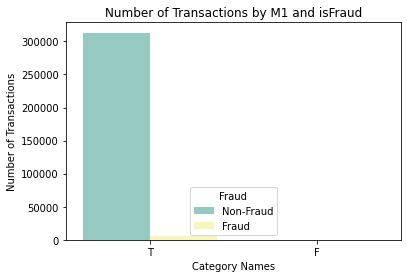

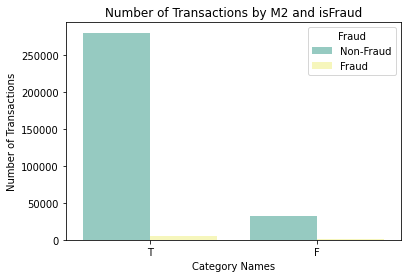

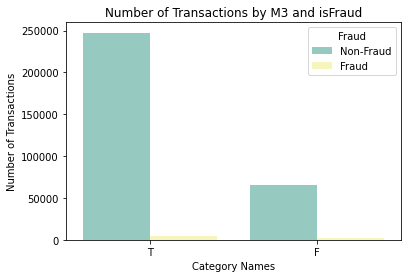

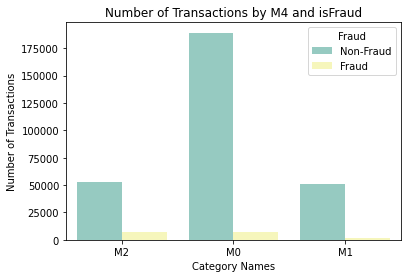

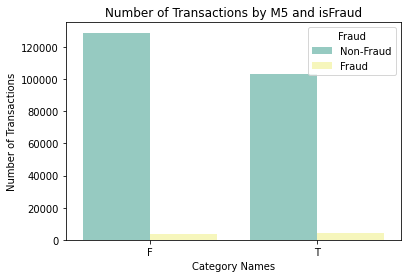

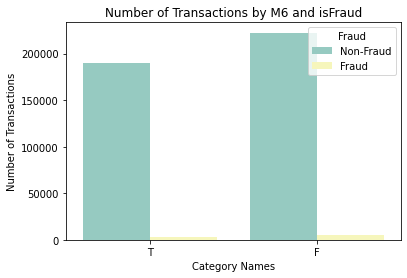

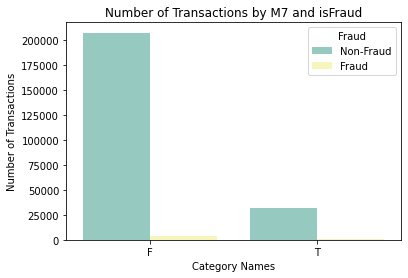

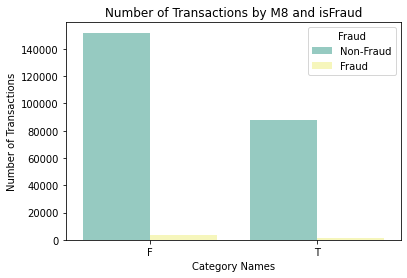

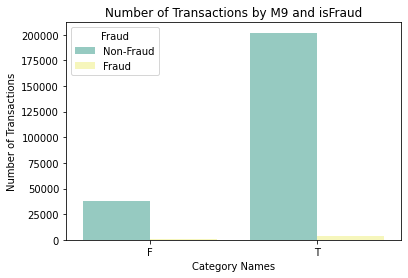

In [ ]:
#create graphs for number of transactions by M1-M9 respectively
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']: 
    g = sns.countplot(x=col, hue='isFraud', data=clean_train_trans,palette="Set3")
    plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
    g.set_title("Number of Transactions by "+ col+" and isFraud")
    g.set_xlabel("Category Names")
    g.set_ylabel("Number of Transactions")

    plt.show()

Every column except for M4 in M1-M9 has two unique values "T" and "F".  M4 has three categories "M0","M1" and "M2".

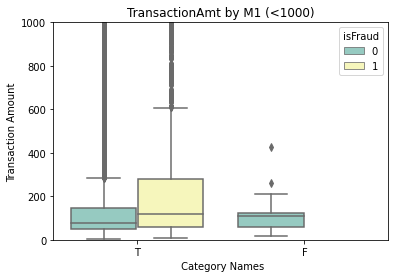

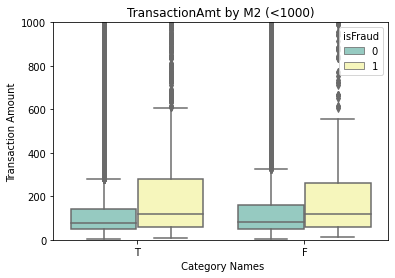

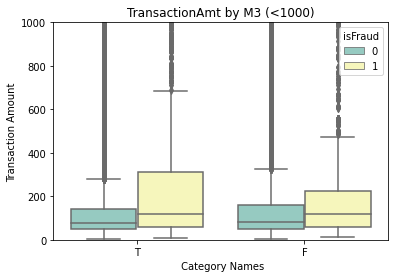

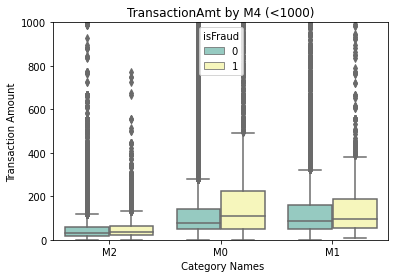

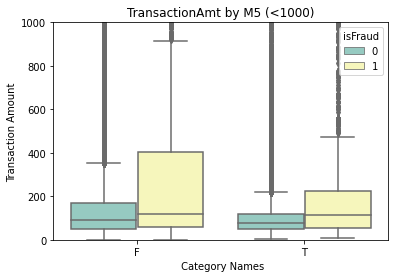

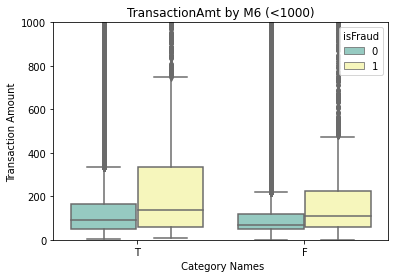

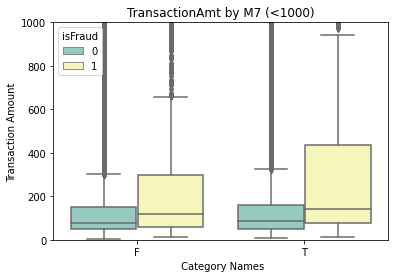

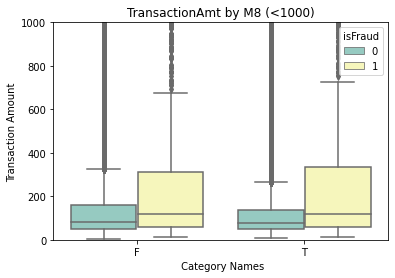

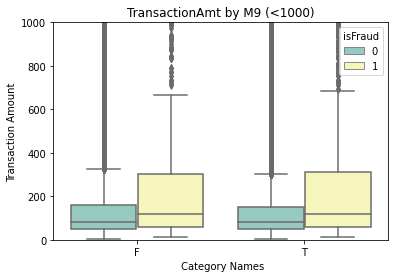

In [ ]:
#create graphs for Transaction Amount by M1-M9 respectively
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']: 
   g = sns.boxplot(x=col, y='TransactionAmt', hue='isFraud', data=clean_train_trans,palette="Set3")
   g.set_title("TransactionAmt by " +col+ " (<1000)")
   g.set_xlabel(" Category Names")
   g.set_ylabel("Transaction Amount")
   plt.ylim([0, 1000])

   plt.show()

##P_emaildomain: purchaser email domain

[Text(0, 0, 'gmail.com'),
 Text(0, 0, 'outlook.com'),
 Text(0, 0, 'yahoo.com'),
 Text(0, 0, 'mail.com'),
 Text(0, 0, 'anonymous.com'),
 Text(0, 0, 'hotmail.com'),
 Text(0, 0, 'verizon.net'),
 Text(0, 0, 'aol.com'),
 Text(0, 0, 'me.com'),
 Text(0, 0, 'comcast.net'),
 Text(0, 0, 'optonline.net'),
 Text(0, 0, 'cox.net'),
 Text(0, 0, 'charter.net'),
 Text(0, 0, 'rocketmail.com'),
 Text(0, 0, 'prodigy.net.mx'),
 Text(0, 0, 'embarqmail.com'),
 Text(0, 0, 'icloud.com'),
 Text(0, 0, 'live.com.mx'),
 Text(0, 0, 'gmail'),
 Text(0, 0, 'live.com'),
 Text(0, 0, 'att.net'),
 Text(0, 0, 'juno.com'),
 Text(0, 0, 'ymail.com'),
 Text(0, 0, 'sbcglobal.net'),
 Text(0, 0, 'bellsouth.net'),
 Text(0, 0, 'msn.com'),
 Text(0, 0, 'q.com'),
 Text(0, 0, 'yahoo.com.mx'),
 Text(0, 0, 'centurylink.net'),
 Text(0, 0, 'servicios-ta.com'),
 Text(0, 0, 'earthlink.net'),
 Text(0, 0, 'hotmail.es'),
 Text(0, 0, 'cfl.rr.com'),
 Text(0, 0, 'roadrunner.com'),
 Text(0, 0, 'netzero.net'),
 Text(0, 0, 'gmx.de'),
 Text(0, 0, 'sud

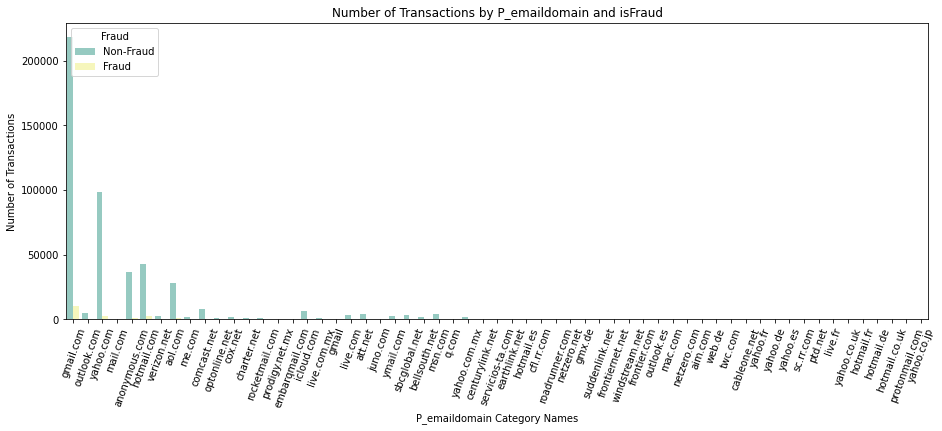

In [ ]:
plt.figure(figsize=(34,12))
plt.subplot(221)
g = sns.countplot(x='P_emaildomain', hue='isFraud', data=clean_train_trans,palette="Set3")
plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Transactions by P_emaildomain and isFraud")
g.set_xlabel("P_emaildomain Category Names")
g.set_ylabel("Number of Transactions")
g.set_xticklabels(g.get_xticklabels(),rotation = 70)

In [ ]:
clean_train_trans["P_emaildomain"].nunique()

59

Text(0, 0.5, 'Number of Transactions')

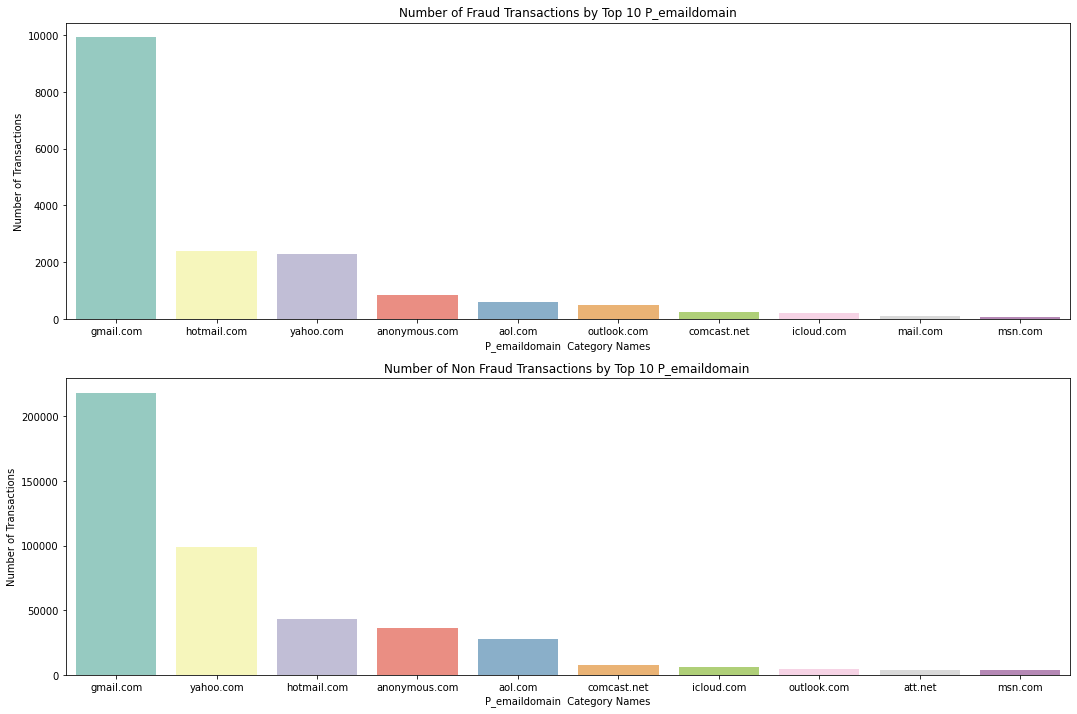

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(211)
g = sns.countplot(x='P_emaildomain', order=pd.value_counts(Fraud['P_emaildomain']).iloc[:10].index, data=Fraud,palette="Set3")
#plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Fraud Transactions by Top 10 P_emaildomain")
g.set_xlabel("P_emaildomain  Category Names")
g.set_ylabel("Number of Transactions")
#g.set_xticklabels(g.get_xticklabels(),rotation = 70)
plt.subplot(212)
g = sns.countplot(x='P_emaildomain',  order=pd.value_counts(NonFraud['P_emaildomain']).iloc[:10].index,data=NonFraud,palette="Set3")
#plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Non Fraud Transactions by Top 10 P_emaildomain ")
g.set_xlabel("P_emaildomain  Category Names")
g.set_ylabel("Number of Transactions")
#g.set_xticklabels(g.get_xticklabels(),rotation = 70)

##R_emaildomain : recipient email domain

[Text(0, 0, 'gmail.com'),
 Text(0, 0, 'hotmail.com'),
 Text(0, 0, 'outlook.com'),
 Text(0, 0, 'anonymous.com'),
 Text(0, 0, 'charter.net'),
 Text(0, 0, 'prodigy.net.mx'),
 Text(0, 0, 'comcast.net'),
 Text(0, 0, 'live.com.mx'),
 Text(0, 0, 'icloud.com'),
 Text(0, 0, 'yahoo.com'),
 Text(0, 0, 'aol.com'),
 Text(0, 0, 'juno.com'),
 Text(0, 0, 'att.net'),
 Text(0, 0, 'verizon.net'),
 Text(0, 0, 'yahoo.com.mx'),
 Text(0, 0, 'bellsouth.net'),
 Text(0, 0, 'servicios-ta.com'),
 Text(0, 0, 'ymail.com'),
 Text(0, 0, 'hotmail.es'),
 Text(0, 0, 'msn.com'),
 Text(0, 0, 'optonline.net'),
 Text(0, 0, 'live.com'),
 Text(0, 0, 'gmx.de'),
 Text(0, 0, 'aim.com'),
 Text(0, 0, 'mail.com'),
 Text(0, 0, 'me.com'),
 Text(0, 0, 'outlook.es'),
 Text(0, 0, 'cox.net'),
 Text(0, 0, 'earthlink.net'),
 Text(0, 0, 'embarqmail.com'),
 Text(0, 0, 'web.de'),
 Text(0, 0, 'sbcglobal.net'),
 Text(0, 0, 'scranton.edu'),
 Text(0, 0, 'mac.com'),
 Text(0, 0, 'twc.com'),
 Text(0, 0, 'roadrunner.com'),
 Text(0, 0, 'yahoo.fr'),
 T

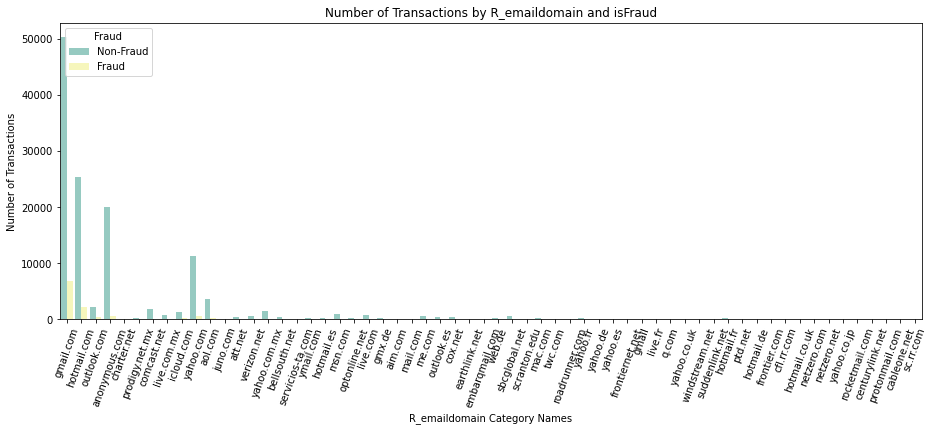

In [ ]:
plt.figure(figsize=(34,12))
plt.subplot(221)
g = sns.countplot(x='R_emaildomain', hue='isFraud', data=clean_train_trans,palette="Set3")
plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Transactions by R_emaildomain and isFraud")
g.set_xlabel("R_emaildomain Category Names")
g.set_ylabel("Number of Transactions")
g.set_xticklabels(g.get_xticklabels(),rotation = 70)

Text(0, 0.5, 'Number of Transactions')

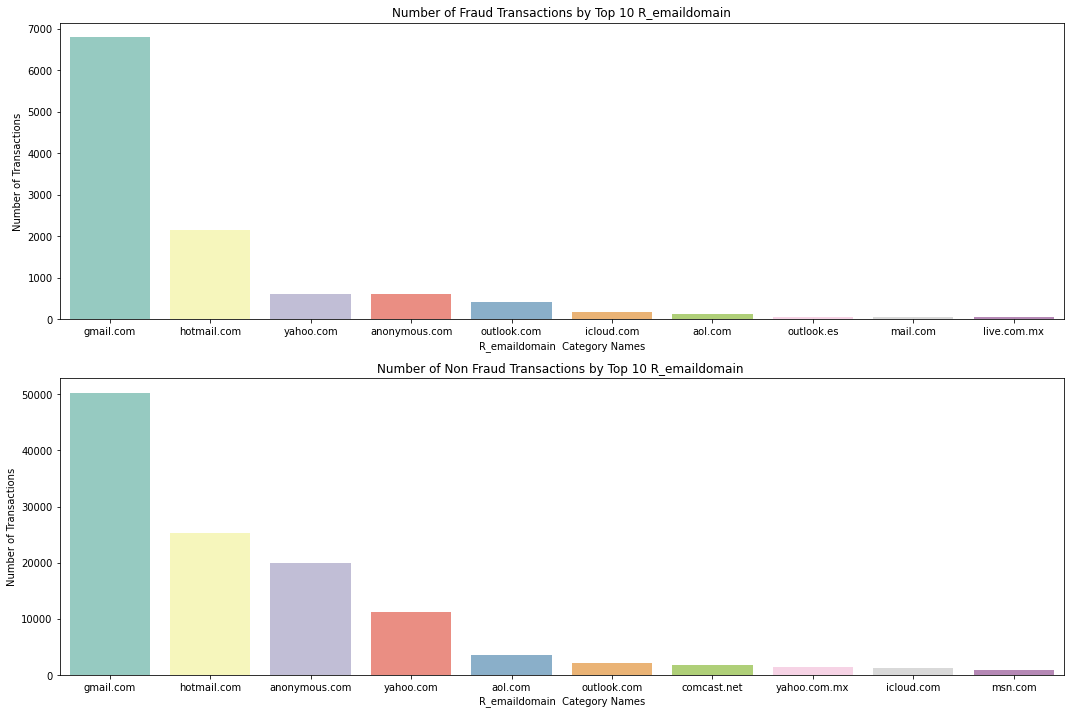

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(211)
g = sns.countplot(x='R_emaildomain', order=pd.value_counts(Fraud['R_emaildomain']).iloc[:10].index, data=Fraud,palette="Set3")
#plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Fraud Transactions by Top 10 R_emaildomain")
g.set_xlabel("R_emaildomain  Category Names")
g.set_ylabel("Number of Transactions")
#g.set_xticklabels(g.get_xticklabels(),rotation = 70)
plt.subplot(212)
g = sns.countplot(x='R_emaildomain',  order=pd.value_counts(NonFraud['R_emaildomain']).iloc[:10].index,data=NonFraud,palette="Set3")
#plt.legend(title='Fraud', loc='best', labels=['Non-Fraud', 'Fraud'])
g.set_title("Number of Non Fraud Transactions by Top 10 R_emaildomain ")
g.set_xlabel("R_emaildomain  Category Names")
g.set_ylabel("Number of Transactions")
#g.set_xticklabels(g.get_xticklabels(),rotation = 70)

##Device Type : type of device used for transaction 

In [ ]:
clean_train_id["DeviceType"].nunique()

2

Text(0, 0.5, 'Number of Transactions')

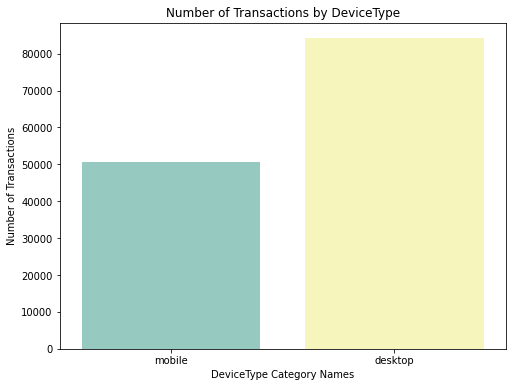

In [ ]:
plt.figure(figsize=(8,6))

g = sns.countplot(x='DeviceType', data=clean_train_id,palette="Set3")

g.set_title("Number of Transactions by DeviceType")
g.set_xlabel("DeviceType Category Names")
g.set_ylabel("Number of Transactions")


There are two categories for Device type-- mobile or desktop.  There are more transactions on desktop than on mobile.